# 10. 時間序列(time series)

In [1]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime as dt
from datetime import datetime
from pandas.tseries.offsets import Hour, Minute, Day, MonthEnd

應用場景:
- 特定的時刻: 時間戳(timestamp)
- 固定時期(period), 如 2010年全年
- 時間間隔(interval)。時期可以視為時間間隔的一種特例
- 過程時間，每個時間點都是相對於特定起始時間的一個度量。

##日期和時間數據類型及工具

In [34]:
now = datetime.now()
now

datetime.datetime(2015, 11, 3, 13, 1, 2, 869900)

In [35]:
print(now.year, now.month, now.day, now.hour, now.second, now.microsecond)

2015 11 3 13 2 869900


In [45]:
# timedelta()計算兩個 datetime之間的時間差
delta = datetime(2011, 7, 1) - datetime(2008, 6, 24, 8, 15)
delta
# 時間差是一個 timedelta物件

datetime.timedelta(1101, 56700)

In [52]:
delta.days

1101

In [54]:
# 直接建立一個 timedelta物件
delta = dt.timedelta(926, 56700)

In [55]:
delta.days

926

In [56]:
delta.seconds

56700

In [57]:
delta = dt.timedelta(2, 0)

# timedelta 可以和一個 datetime物件相加
datetime(2011, 7, 1) + delta

datetime.datetime(2011, 7, 3, 0, 0)

In [60]:
# timedelta 可以和一個 datetime物件的倍數相減
datetime(2011, 7, 1) - delta * 2

datetime.datetime(2011, 6, 27, 0, 0)

In [62]:
d = datetime(2011, 7, 1)

# datetime物件的 date()方法
d.date()

datetime.date(2011, 7, 1)

In [65]:
d.time()

datetime.time(0, 0)

## 字串和datetime相互轉換

In [66]:
stamp = datetime(2011, 1, 3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [67]:
#轉換為 字串
str(stamp)

'2011-01-03 00:00:00'

In [77]:
# 格式化為字串
ts = stamp.strftime('%Y-%m-%d')

In [78]:
# 從字串轉換為 datetime
stamp.strptime(ts, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [81]:
ts = ['7/6/2011', '8/6/2100']
[datetime.strptime(t, '%m/%d/%Y') for t in ts]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2100, 8, 6, 0, 0)]

#### dateutil.parser.parse 用來parse字串成為datetime很方便

In [82]:
# dateutil.parser.parse 用來parse字串成為datetime很方便
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [88]:
parse('jan 31, 1997, 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [90]:
# dayfirst = True，可以解決國際通用格式中 日 通常出現在月的前面所造成的問題
parse('6/12/2011', dayfirst = True)

datetime.datetime(2011, 12, 6, 0, 0)

In [96]:
# pandas.to_datetime()可以同時解析不同的日期格式
ts = ['7/6/2011', '8/6/2011']
pd.to_datetime(ts)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [99]:
# 還可以處理缺失值，用 NaT 代表 datetime缺失值
idx = pd.to_datetime(ts + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [100]:
idx[2]

NaT

In [102]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## 時間序列基礎

pandas最基本的時間序列類型就是以時間戳記為索引的Series

In [103]:
import datetime as dt
from datetime import datetime

In [104]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [115]:
ts = Series(np.random.randn(6), index = dates)
ts

2011-01-02    0.459008
2011-01-05    0.452175
2011-01-07    1.357216
2011-01-08   -1.522207
2011-01-10   -0.038752
2011-01-12   -0.834275
dtype: float64

In [117]:
type(ts)

pandas.core.series.Series

In [116]:
# ts的索引是一個 DatetimeIndex物件
type(ts.index)

pandas.tseries.index.DatetimeIndex

In [118]:
# DatatimeIndex是以 np 的 ns儲存時間戳記
ts.index.dtype

dtype('<M8[ns]')

In [120]:
# DatetimeIndex中的元素都是 Timestamp物件
stamp = ts.index[1]
stamp

Timestamp('2011-01-05 00:00:00')

### 索引、選取、子集構造

In [121]:
stamp = ts.index[2]

# 用 Timestamp來當索引
ts[stamp]

1.357216064365145

#### 可以直接傳入日期字串來做為索引，會自動轉換為Timestamp之後再索引取值

In [126]:
# 可以直接傳入日期字串來做為索引，會自動轉換為Timestamp之後再索引取值
# 會嘗試依照多種格式來 parse，就如同 dateutil.parser.parse
ts['2011-01-07']

1.357216064365145

In [127]:
ts['20110107']

1.357216064365145

In [128]:
ts['1/7/2011']

1.357216064365145

In [136]:
# 用 pd.date_range( , periods = n)來建構時間range
longer_ts = Series(np.random.randn(1000),
                   index = pd.date_range('1/1/2000', periods = 1000))
longer_ts[:5]

2000-01-01    0.793834
2000-01-02   -1.859297
2000-01-03   -0.851378
2000-01-04    1.722752
2000-01-05    1.170934
Freq: D, dtype: float64

In [138]:
# 整年
longer_ts['2001'][:5]

2001-01-01    0.729838
2001-01-02   -3.752655
2001-01-03   -1.372652
2001-01-04    0.642403
2001-01-05    0.280069
Freq: D, dtype: float64

In [141]:
# 整月
longer_ts['2001-05'][:5]

2001-05-01   -1.268758
2001-05-02    0.515604
2001-05-03    0.063105
2001-05-04   -0.389452
2001-05-05    0.970778
Freq: D, dtype: float64

In [146]:
# 可以用datetime來做切片
longer_ts[datetime(2001, 7, 1):][:5]

2001-07-01   -1.590617
2001-07-02   -1.674750
2001-07-03   -0.829381
2001-07-04   -1.157311
2001-07-05   -0.401168
Freq: D, dtype: float64

In [147]:
# 可以使用 不存在於 index TimeSeries中的datetime來切片
ts

2011-01-02    0.459008
2011-01-05    0.452175
2011-01-07    1.357216
2011-01-08   -1.522207
2011-01-10   -0.038752
2011-01-12   -0.834275
dtype: float64

In [149]:
# 可以使用 不存在於 index TimeSeries中的datetime來切片
ts['2011/1/3': '2011/1/11']

2011-01-05    0.452175
2011-01-07    1.357216
2011-01-08   -1.522207
2011-01-10   -0.038752
dtype: float64

In [151]:
# 建立一個切片的副本
ts2 = Series(ts['2011/1/3': '2011/1/11'])
ts2

2011-01-05    0.452175
2011-01-07    1.357216
2011-01-08   -1.522207
2011-01-10   -0.038752
dtype: float64

In [152]:
# truncate()方法
ts.truncate(after = '1/9/2011')

2011-01-02    0.459008
2011-01-05    0.452175
2011-01-07    1.357216
2011-01-08   -1.522207
dtype: float64

In [154]:
# 上述操作對DataFrame也有效
dates = pd.date_range('1/1/2000', periods = 100, freq = 'W-WED')
long_df = DataFrame(np.random.randn(100, 4), 
                    index = dates, 
                    columns = ['New York', 'Colorado', 'Texas', 'Ohio'])
long_df[:5]

,New York,Colorado,Texas,Ohio
2000-01-05,-2.302650,0.936581,1.230162,-0.426123
2000-01-12,0.252724,0.243313,0.064413,-0.621839
2000-01-19,0.715354,-0.921104,0.722151,-0.314630
2000-01-26,-0.840553,0.914166,-0.823243,-0.179865
2000-02-02,0.110000,1.721441,-0.674695,-1.315657


In [157]:
long_df.ix['5-2001']

,New York,Colorado,Texas,Ohio
2001-05-02,0.067182,0.979464,1.818209,0.948864
2001-05-09,-1.063242,0.271570,0.209759,0.652169
2001-05-16,-0.168215,2.166337,-1.909414,0.845627
2001-05-23,-0.694445,-0.385292,-0.139211,-0.545591
2001-05-30,0.146747,0.872099,1.290675,0.216517


### 帶有重複索引的時間序列

In [158]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = Series(np.random.randn(5), index = dates)
dup_ts

2000-01-01   -0.291594
2000-01-02   -0.933056
2000-01-02    0.005479
2000-01-02   -2.012004
2000-01-03   -1.818693
dtype: float64

In [159]:
# 索引不重複，取得單一值
dup_ts['1/3/2000']

-1.818692798320148

In [163]:
# 索引重複，取得一個 Series
dup_ts['1/2/2000']

2000-01-02   -0.933056
2000-01-02    0.005479
2000-01-02   -2.012004
dtype: float64

In [164]:
# 對重複的索引做 groupby(level = 0)
grouped = dup_ts.groupby(level = 0)
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [165]:
grouped.mean()

2000-01-01   -0.291594
2000-01-02   -0.979860
2000-01-03   -1.818693
dtype: float64

## 日期的範圍、頻率以及移動

In [166]:
ts

2011-01-02    0.459008
2011-01-05    0.452175
2011-01-07    1.357216
2011-01-08   -1.522207
2011-01-10   -0.038752
2011-01-12   -0.834275
dtype: float64

In [171]:
# 用 resample()重新取樣，將不規則的區間變成規則的
ts.resample('D')

2011-01-02    0.459008
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.452175
2011-01-06         NaN
2011-01-07    1.357216
2011-01-08   -1.522207
2011-01-09         NaN
2011-01-10   -0.038752
2011-01-11         NaN
2011-01-12   -0.834275
Freq: D, dtype: float64

### 生成日期範圍

In [173]:
# date_range()，預設是以 天 為周期
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [175]:
# 產生的是一個 DatetimeIndex物件
type(index)

pandas.tseries.index.DatetimeIndex

In [176]:
# 以某一天作為開始，以參數 periods 設定區間天數
pd.date_range(start = '1/1/2011', periods = 20)

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16',
               '2011-01-17', '2011-01-18', '2011-01-19', '2011-01-20'],
              dtype='datetime64[ns]', freq='D')

In [178]:
# 以某一天作為結束，以參數 periods 設定區間天數
pd.date_range(end = '1/1/2011', periods = 20)

DatetimeIndex(['2010-12-13', '2010-12-14', '2010-12-15', '2010-12-16',
               '2010-12-17', '2010-12-18', '2010-12-19', '2010-12-20',
               '2010-12-21', '2010-12-22', '2010-12-23', '2010-12-24',
               '2010-12-25', '2010-12-26', '2010-12-27', '2010-12-28',
               '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-01'],
              dtype='datetime64[ns]', freq='D')

In [179]:
# 用 freq 參數，加上一些頻率標記，可以指定重複的頻率模式
# BM 代表 Business end of Month，每月最後一個工作天
pd.date_range('1/1/2000', '12/1/2000', freq = 'BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [181]:
# date_range()預設會保留起始和結束時間戳記的時間訊息
pd.date_range('5/2/2000 12:56:32', periods = 10)

DatetimeIndex(['2000-05-02 12:56:32', '2000-05-03 12:56:32',
               '2000-05-04 12:56:32', '2000-05-05 12:56:32',
               '2000-05-06 12:56:32', '2000-05-07 12:56:32',
               '2000-05-08 12:56:32', '2000-05-09 12:56:32',
               '2000-05-10 12:56:32', '2000-05-11 12:56:32'],
              dtype='datetime64[ns]', freq='D')

In [184]:
# normalize = True 會將時間設定為午夜
pd.date_range('5/2/2000 12:56:32', periods = 10, normalize = True)

DatetimeIndex(['2000-05-02', '2000-05-03', '2000-05-04', '2000-05-05',
               '2000-05-06', '2000-05-07', '2000-05-08', '2000-05-09',
               '2000-05-10', '2000-05-11'],
              dtype='datetime64[ns]', freq='D')

### 頻率和日期偏移量

pandas 中的頻率是由一個基礎頻率(base frequency)和一個乘數組成的。

基礎品率通常由一個字串別名表示，例如 M 代表每月，H 代表每小時。

每個基礎頻率都有一個 日期偏移量(date offset)的物件與之對應。例如 按小時計算的頻率可以用 Hour類別表示:

In [221]:
from pandas.tseries.offsets import Hour, Minute, Day, MonthEnd
hour = Hour()
hour

<Hour>

In [187]:
# 偏移量類別 Hour
four_hours = Hour(4)
four_hours

<4 * Hours>

In [191]:
# 在基礎頻率前面放一個整數即可創建倍數:
# freq = '4h'，代表每4個小時一個數據
pd.date_range('1/1/2000 12:00 AM', periods = 20, freq =  '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00',
               '2000-01-04 00:00:00', '2000-01-04 04:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [192]:
# 偏移量物件可以做算術運算
Hour(4) + Minute(15)

<255 * Minutes>

In [195]:
# 偏移量物件可以做算術運算
timeOffset = Hour(4) - Minute(15)
timeOffset

<225 * Minutes>

In [197]:
# 偏移量物件可以做為 freq參數的值
pd.date_range('1/1/2000 12:00 AM', periods = 20, freq = timeOffset)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 03:45:00',
               '2000-01-01 07:30:00', '2000-01-01 11:15:00',
               '2000-01-01 15:00:00', '2000-01-01 18:45:00',
               '2000-01-01 22:30:00', '2000-01-02 02:15:00',
               '2000-01-02 06:00:00', '2000-01-02 09:45:00',
               '2000-01-02 13:30:00', '2000-01-02 17:15:00',
               '2000-01-02 21:00:00', '2000-01-03 00:45:00',
               '2000-01-03 04:30:00', '2000-01-03 08:15:00',
               '2000-01-03 12:00:00', '2000-01-03 15:45:00',
               '2000-01-03 19:30:00', '2000-01-03 23:15:00'],
              dtype='datetime64[ns]', freq='225T')

In [201]:
# freq參數 也可接收描述字串
pd.date_range('1/1/2000 12:00 AM', periods = 20, freq = '225min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 03:45:00',
               '2000-01-01 07:30:00', '2000-01-01 11:15:00',
               '2000-01-01 15:00:00', '2000-01-01 18:45:00',
               '2000-01-01 22:30:00', '2000-01-02 02:15:00',
               '2000-01-02 06:00:00', '2000-01-02 09:45:00',
               '2000-01-02 13:30:00', '2000-01-02 17:15:00',
               '2000-01-02 21:00:00', '2000-01-03 00:45:00',
               '2000-01-03 04:30:00', '2000-01-03 08:15:00',
               '2000-01-03 12:00:00', '2000-01-03 15:45:00',
               '2000-01-03 19:30:00', '2000-01-03 23:15:00'],
              dtype='datetime64[ns]', freq='225T')

In [202]:
# freq參數 也可接收描述字串
pd.date_range('1/1/2000 12:00 AM', periods = 20, freq = '3h45min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 03:45:00',
               '2000-01-01 07:30:00', '2000-01-01 11:15:00',
               '2000-01-01 15:00:00', '2000-01-01 18:45:00',
               '2000-01-01 22:30:00', '2000-01-02 02:15:00',
               '2000-01-02 06:00:00', '2000-01-02 09:45:00',
               '2000-01-02 13:30:00', '2000-01-02 17:15:00',
               '2000-01-02 21:00:00', '2000-01-03 00:45:00',
               '2000-01-03 04:30:00', '2000-01-03 08:15:00',
               '2000-01-03 12:00:00', '2000-01-03 15:45:00',
               '2000-01-03 19:30:00', '2000-01-03 23:15:00'],
              dtype='datetime64[ns]', freq='225T')

In [203]:
pd.date_range('1/1/2000 12:00 AM', periods = 20, freq = '225T')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 03:45:00',
               '2000-01-01 07:30:00', '2000-01-01 11:15:00',
               '2000-01-01 15:00:00', '2000-01-01 18:45:00',
               '2000-01-01 22:30:00', '2000-01-02 02:15:00',
               '2000-01-02 06:00:00', '2000-01-02 09:45:00',
               '2000-01-02 13:30:00', '2000-01-02 17:15:00',
               '2000-01-02 21:00:00', '2000-01-03 00:45:00',
               '2000-01-03 04:30:00', '2000-01-03 08:15:00',
               '2000-01-03 12:00:00', '2000-01-03 15:45:00',
               '2000-01-03 19:30:00', '2000-01-03 23:15:00'],
              dtype='datetime64[ns]', freq='225T')

#### WOM(Week Of Month)日期

In [205]:
# WOM很方便，可以得到 '每月的第三個星期五' 之類的日期
rng = pd.date_range('1/1/2012', '9/1/2012', freq = 'WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### 移動(shifting)(超前和滯後)數據

In [209]:
# 使用 shift()方法，來移動資料，同時保持索引不動
ts = Series(np.random.randn(4), 
            index = pd.date_range('1/1/2000', periods = 4, freq = 'M'))
ts

2000-01-31    0.704329
2000-02-29    1.244657
2000-03-31   -0.073168
2000-04-30   -1.046914
Freq: M, dtype: float64

In [211]:
# 數值往上移動兩格
ts.shift(-2)

2000-01-31   -0.073168
2000-02-29   -1.046914
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [210]:
# 數值往下移動兩格
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.704329
2000-04-30    1.244657
Freq: M, dtype: float64

In [216]:
# 如果頻率已知，則可以設定shift()方法的 freq變數，以便對時間戳索引位移，而不是對內容數值位移
# 時間索引 增加兩次，每次一個月
ts.shift(2,  freq = 'M')

2000-03-31    0.704329
2000-04-30    1.244657
2000-05-31   -0.073168
2000-06-30   -1.046914
Freq: M, dtype: float64

In [218]:
# 時間索引，增加兩次，每次一天
ts.shift(2,  freq = 'D')

2000-02-02    0.704329
2000-03-02    1.244657
2000-04-02   -0.073168
2000-05-02   -1.046914
dtype: float64

In [220]:
# 時間索引，增加一次，每次兩天
ts.shift(1,  freq = '2D')

2000-02-02    0.704329
2000-03-02    1.244657
2000-04-02   -0.073168
2000-05-02   -1.046914
dtype: float64

#### 通過偏移量對日期進行位移

In [224]:
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [225]:
now + Day(3)

Timestamp('2011-11-20 00:00:00')

In [226]:
# 錨點偏移量，第一次增量的結果，會落在第一個符合錨點規則的日期
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [227]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [229]:
# 錨點偏移量 有 rollforward(), rollback()方法
monthEnd = MonthEnd()
monthEnd.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [230]:
monthEnd.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [231]:
# 結合groupby
ts = Series(np.random.randn(20), 
            index = pd.date_range('1/15/2000', periods = 20, freq = '4d'))
ts

2000-01-15   -0.197826
2000-01-19    0.565197
2000-01-23   -0.229873
2000-01-27    1.609725
2000-01-31   -0.157119
2000-02-04    1.529674
2000-02-08    0.228138
2000-02-12   -0.635474
2000-02-16    0.447658
2000-02-20    0.616903
2000-02-24    0.710514
2000-02-28    1.406731
2000-03-03   -0.152247
2000-03-07   -0.285601
2000-03-11   -1.020941
2000-03-15    1.879974
2000-03-19   -0.925041
2000-03-23    1.324938
2000-03-27    1.031310
2000-03-31    1.431036
Freq: 4D, dtype: float64

In [233]:
# 計算每月平均
ts.groupby(monthEnd.rollforward).mean()

2000-01-31    0.318021
2000-02-29    0.614878
2000-03-31    0.410428
dtype: float64

In [234]:
ts.resample('M', how = 'mean')

2000-01-31    0.318021
2000-02-29    0.614878
2000-03-31    0.410428
Freq: M, dtype: float64

## 時區(time zone)處理

In [240]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [242]:
tz = pytz.timezone('US/Eastern')
tz
# 是一個 DstTzInfo物件

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### 本地化和轉換

In [243]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')
ts = Series(np.random.randn(len(rng)), index = rng)
ts

2012-03-09 09:30:00   -0.468871
2012-03-10 09:30:00    2.141916
2012-03-11 09:30:00   -1.470772
2012-03-12 09:30:00    0.022393
2012-03-13 09:30:00    1.453978
2012-03-14 09:30:00    1.244936
Freq: D, dtype: float64

In [246]:
# index物件為 DatetimeIndex
type(ts.index)

pandas.tseries.index.DatetimeIndex

In [245]:
# index物件為 DatetimeIndex，其 tz物件為None
type(ts.index.tz)

NoneType

In [249]:
# 生成 DatetimeIndex 的時候可以設定 tz參數
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D', tz = 'UTC')
ts = Series(np.random.randn(len(rng)), index = rng)
ts

2012-03-09 09:30:00+00:00   -0.332887
2012-03-10 09:30:00+00:00   -1.327489
2012-03-11 09:30:00+00:00    0.837550
2012-03-12 09:30:00+00:00    0.116382
2012-03-13 09:30:00+00:00    1.258929
2012-03-14 09:30:00+00:00   -0.993811
Freq: D, dtype: float64

In [250]:
# index物件為 DatetimeIndex，其 tz物件為 pytz.UTC
type(ts.index.tz)

pytz.UTC

In [266]:
# 如果建立 DatetimeIndex 的時候沒有設定timezone，可以使用 tz_localize()來補設
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')
ts = Series(np.random.randn(len(rng)), index = rng)

# 設定 DatetimeIndex 的timezone
ts = ts.tz_localize('UTC')
ts

2012-03-09 09:30:00+00:00    0.357470
2012-03-10 09:30:00+00:00   -0.427994
2012-03-11 09:30:00+00:00    0.770363
2012-03-12 09:30:00+00:00   -1.031639
2012-03-13 09:30:00+00:00   -0.777752
2012-03-14 09:30:00+00:00    1.306519
Freq: D, dtype: float64

In [267]:
type(ts.index.tz)

pytz.UTC

In [268]:
# 使用 tz_convert()來轉換到別的時區
ts_local = ts.tz_convert('Asia/Taipei')
ts_local

2012-03-09 17:30:00+08:00    0.357470
2012-03-10 17:30:00+08:00   -0.427994
2012-03-11 17:30:00+08:00    0.770363
2012-03-12 17:30:00+08:00   -1.031639
2012-03-13 17:30:00+08:00   -0.777752
2012-03-14 17:30:00+08:00    1.306519
Freq: D, dtype: float64

In [269]:
type(ts_local.index.tz)

pytz.tzfile.Asia/Taipei

In [282]:
# tz_localize(), tz_convert()也是的 DatetimeIndex 實例方法
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')

# 補上 tz屬性
rng = rng.tz_localize('UTC')

# 轉換 tz
rng = rng.tz_convert('Asia/Taipei')

ts = Series(np.random.randn(len(rng)), index = rng)
type(ts.index.tz)

pytz.tzfile.Asia/Taipei

### 操作時區意識型 Timestamp物件

Timestamp物件也能從 單純型(naive) 本地化為 時區意識型(time zone aware)物件，並從一個時區轉換到另外一個時區

In [284]:
stamp = pd.Timestamp('2011/3/11 4:00')
stamp

Timestamp('2011-03-11 04:00:00')

In [285]:
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2011-03-11 04:00:00+0000', tz='UTC')

In [287]:
stamp_tpi = stamp_utc.tz_convert('Asia/Taipei')
stamp_tpi

Timestamp('2011-03-11 12:00:00+0800', tz='Asia/Taipei')

In [288]:
# 時區意識型(time zone aware)Timestamp物件的內部保留一個 UTC的時間戳記(以1970/1/1開始計算的 ns數)
# 不論怎麼轉換timezone，其值都不會變
stamp_tpi.value 

1299816000000000000

In [289]:
stamp_tpi.tz_convert('UTC').value 

1299816000000000000

In [290]:
# 使用 pandas的 DateOffset物件來計算時間時，會自動將日光節約時間納入考慮
stamp = pd.Timestamp('2012/3/12 1:30', tz = 'US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [291]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [298]:
# 夏令時間轉變前90分鐘
stamp = pd.Timestamp('2012/11/4 00:30', tz = 'US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [300]:
stamp + Hour(2)

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同時區之間的運算

In [311]:
# 兩個不同時區的 Timestamp做運算，最終結果是以UTC為時區
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')
ts = Series(np.random.randn(len(rng)), index = rng)
ts

2012-03-09 09:30:00    0.685584
2012-03-10 09:30:00   -0.029945
2012-03-11 09:30:00    0.085580
2012-03-12 09:30:00   -0.653839
2012-03-13 09:30:00   -0.594357
2012-03-14 09:30:00    0.203156
Freq: D, dtype: float64

In [312]:
ts1 = ts[:3].tz_localize('UTC')
ts1

2012-03-09 09:30:00+00:00    0.685584
2012-03-10 09:30:00+00:00   -0.029945
2012-03-11 09:30:00+00:00    0.085580
Freq: D, dtype: float64

In [313]:
ts2 = ts[3:].tz_localize('Asia/Taipei')
ts2

2012-03-12 09:30:00+08:00   -0.653839
2012-03-13 09:30:00+08:00   -0.594357
2012-03-14 09:30:00+08:00    0.203156
Freq: D, dtype: float64

In [320]:
result = ts1 + ts2
result
# 不同時區的timestamp對齊之後，會統一以UTC作為表達時區

2012-03-09 09:30:00+00:00   NaN
2012-03-10 09:30:00+00:00   NaN
2012-03-11 09:30:00+00:00   NaN
2012-03-12 01:30:00+00:00   NaN
2012-03-13 01:30:00+00:00   NaN
2012-03-14 01:30:00+00:00   NaN
dtype: float64

In [319]:
result.index.tz

<UTC>

## 時期(period)與其算術運算

Period就是時間區間，比如數日、數月、數季、數年。

In [3]:
# Period 類別
p = pd.Period(2007, freq = 'A-DEC')
p
# p代表的是 2007/1/1~2007/12/31之間的整段時間。

Period('2007', 'A-DEC')

In [4]:
# 只需要加上或者減去一個整數即可達到根據其頻率進行位移的效果:
p + 5
# 加上五年

Period('2012', 'A-DEC')

In [6]:
p - 2
# 減去兩年

Period('2005', 'A-DEC')

In [7]:
# 若兩個 Period有相同的頻率，則兩者之差就是之間的單位數量
pd.Period('2014', freq = 'A-DEC') - p 

7

#### period_range()用來創建規則的 periods

In [8]:
# period_range()用來創建規則的 periods
# '2000/1' ~ '2001/12', 每個月
rng = pd.period_range('2000/1', '2001/12', freq = 'M')
rng
# 傳回的是一個 PeriodIndex 物件

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
             '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
             '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12'],
            dtype='int64', freq='M')

In [11]:
# PeriodIndex物件中含有許多 Period物件
rng[2]

Period('2000-03', 'M')

In [12]:
# Period 類別
type(rng[2])

pandas._period.Period

In [15]:
# 用 PeriodIndex 當作Series的索引
ps = Series(np.random.randn(24), index = rng)
ps[:5]

2000-01    0.739979
2000-02   -0.157637
2000-03   -0.710469
2000-04    0.462600
2000-05    0.867302
Freq: M, dtype: float64

In [19]:
ps.index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
             '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
             '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12'],
            dtype='int64', freq='M')

In [17]:
type(ps.index[3])

pandas._period.Period

In [20]:
# 使用字串當作period
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq = 'Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

In [21]:
len(index)

3

### 時期的頻率轉換

In [25]:
p = pd.Period('2007', freq = 'A-DEC')
p

Period('2007', 'A-DEC')

#### 透過 asfreq() 來轉換頻率

In [26]:
# 透過 asfreq() 來轉換頻率
p.asfreq('M', how = 'start')

Period('2007-01', 'M')

In [27]:
p.asfreq('M', how = 'end')

Period('2007-12', 'M')

In [28]:
# 2007年，以六月為終止月份的 年度時期
p = pd.Period('2007', freq = 'A-JUN')
p

Period('2007', 'A-JUN')

In [29]:
p.asfreq('M', how = 'start')
# 因為 6 月是終止月，所以2007年度的首月是 2006/7

Period('2006-07', 'M')

In [30]:
p.asfreq('M', how = 'end')
# 因為 6 月是終止月，所以2007年度的終止月份是2007/6

Period('2007-06', 'M')

將高頻率轉換為低頻率時，超時期(superperiod) 是由子時期(subperiod)所屬的位置決定的。

In [33]:
p = pd.Period('2007/8', freq = 'M')
p.asfreq('A-JUN')
# 因為2007/8已經超過 6月，所以歸屬於2008年度

Period('2008', 'A-JUN')

In [36]:
# PeriodIndex, TimeSeries的頻率轉換也是如此
rng = pd.period_range('2006', '2009', freq = 'A-DEC')
ts = Series(np.random.randn(len(rng)), index = rng)
ts

2006   -0.320856
2007   -0.389859
2008    0.733874
2009   -0.537833
Freq: A-DEC, dtype: float64

In [38]:
# 轉換為每年度的第一個月分
ts.asfreq('M', how = 'start')

2006-01   -0.320856
2007-01   -0.389859
2008-01    0.733874
2009-01   -0.537833
Freq: M, dtype: float64

In [39]:
# 轉換為每年度的最後一個工作日
ts.asfreq('B', how = 'end')

2006-12-29   -0.320856
2007-12-31   -0.389859
2008-12-31    0.733874
2009-12-31   -0.537833
Freq: B, dtype: float64

### 按季度計算的時期頻率

In [44]:
# 12種可能的 季度型頻率 Q-JAN ~ Q-DEC
# freq 參數標示的 是季度的最後一個月
p = pd.Period('2012Q4', freq = 'Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [49]:
# 在以1月結束的財報年中，2012Q4是11月到1月
# 轉換為 freq='Q-JAN'之下，2012Q4 的起始日
p.asfreq('D', how = 'start')

Period('2011-11-01', 'D')

In [45]:
# 轉換為 freq='Q-JAN'之下，2012Q4 的起始月
p.asfreq('M', how = 'start')

Period('2011-11', 'M')

In [48]:
# 轉換為 freq='Q-JAN'之下，2012Q4 的終止日
p.asfreq('D', how = 'end')

Period('2012-01-31', 'D')

In [46]:
# 轉換為 freq='Q-JAN'之下，2012Q4 的終止月
p.asfreq('M', how = 'end')

Period('2012-01', 'M')

In [70]:
# 該季度倒數第二個工作日下午四點的時間戳記
stamp = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
stamp

Period('2012-01-30 16:00', 'T')

In [72]:
stamp.to_timestamp()

Timestamp('2012-01-30 16:00:00')

#### period_range()用來生成 季度型範圍

In [73]:
# period_range()用來生成 季度型範圍
rng = pd.period_range('2011Q3', '2012Q4' , freq = 'Q-JAN')
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='int64', freq='Q-JAN')

In [75]:
ts = Series(np.random.randn(len(rng)), index = rng)
ts

2011Q3   -0.698350
2011Q4   -0.171780
2012Q1    1.449568
2012Q2   -2.186671
2012Q3    0.374279
2012Q4   -0.126503
Freq: Q-JAN, dtype: float64

In [76]:
# 對 PeriodIndex 做轉換
# .asfreq()的方法會透過廣播的模式，對 PeriodIndex中的每個成員做轉換
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='int64', freq='T')

In [78]:
# 新的PeriodIndex中是之前每個季度 最後一個工作天的下午四點
ts = Series(np.random.randn(len(new_rng)), index = new_rng)
ts

2010-10-28 16:00    0.835963
2011-01-28 16:00    0.839739
2011-04-28 16:00    0.837740
2011-07-28 16:00   -0.176165
2011-10-28 16:00    0.252388
2012-01-30 16:00   -0.257796
Freq: T, dtype: float64

### 將Timestamp轉換為Period(及其反向過程)

In [83]:
rng = pd.date_range('1/1/2000', periods = 3)
rng
# 沒有設定 freq 參數，預設以 'D' 天為單位

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq='D')

In [84]:
rng = pd.date_range('1/1/2000', periods = 3, freq = 'M')
rng
# freq = 'M', 則以 月 為單位

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [86]:
ts = Series(np.arange(len(rng)), index = rng)
ts

2000-01-31    0
2000-02-29    1
2000-03-31    2
Freq: M, dtype: int32

In [92]:
type(ts.index)
# 索引的型態為 DatetimeIndex

pandas.tseries.index.DatetimeIndex

#### to_period()方法，將timestamp轉換為 period

In [88]:
pts = ts.to_period()
pts

2000-01    0
2000-02    1
2000-03    2
Freq: M, dtype: int32

In [91]:
type(pts.index)
# 索引的型態為 PeriodIndex

pandas.tseries.period.PeriodIndex

#### Series的PeriodIndex中 允許存在重複的periods

In [94]:
rng = pd.date_range('1/29/2000', periods = 6, freq = 'D')
rng

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [95]:
ts = Series(np.arange(len(rng)), index = rng)
ts

2000-01-29    0
2000-01-30    1
2000-01-31    2
2000-02-01    3
2000-02-02    4
2000-02-03    5
Freq: D, dtype: int32

In [97]:
ts.index
# 索引是 DatetimeIndex

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [96]:
# 將Series的索引 轉換為以 月時期為型態
ts.to_period('M')

2000-01    0
2000-01    1
2000-01    2
2000-02    3
2000-02    4
2000-02    5
Freq: M, dtype: int32

In [100]:
# to_timestamp()方法，將 period型態的索引轉換為 timestamp
pts

2000-01    0
2000-02    1
2000-03    2
Freq: M, dtype: int32

In [102]:
pts.index

PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='int64', freq='M')

#### to_timestamp()方法，將period轉換為 timestamp

In [104]:
pts = pts.to_timestamp(how = 'end')
pts
# to_timestamp()方法，將period轉換為 timestamp

2000-01-31    0
2000-02-29    1
2000-03-31    2
Freq: M, dtype: int32

In [105]:
pts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

### 透過數組創建PeriodIndex

In [108]:
data = pd.read_csv('D:\\a 電腦類書籍 CD\\Python\\python for data analysis\\pydata-book\\ch08\\macrodata.csv')
data[:5]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [114]:
# 以一個 DataFrame的兩個 columns，可以組合成一個 PeriodIndex
index = pd.PeriodIndex(year = data.year, quarter = data.quarter, freq = 'Q-DEC')
index[:5]

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1'], dtype='int64', freq='Q-DEC')

In [117]:
# 再把組合成的 PeriodIndex 設成原來 DataFrame的 row index
data.index = index
data[:5]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [118]:
data.index
# index的型態是 PeriodIndex

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')

In [120]:
data.infl[:5]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

## 重採樣(resampling)及頻率轉換

重採樣(resampling)指的是將時間序列從一個頻率轉換到另外一個頻率的處理過程。

高頻率 數據轉換到 低頻率，稱為 降採樣(down-sampling)

低頻率 數據轉換到 高頻率，稱為 升採樣(up-sampling)

但，將 W-WED 轉換到 W-FRI 不是降採樣，也不是升採樣

pandas 的物件都有一個resample()方法，用來做重採樣

In [121]:
rng = pd.date_range('1/1/2000', freq = 'D', periods = 100)
rng[:5]

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [126]:
ts = Series(range(len(rng)), index = rng)
ts[:5]

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
Freq: D, dtype: int32

In [129]:
# 使用 resample() 轉換頻率
# 天 轉換為 月(以最後一天代表)
# down-sampling的過程中，數值以原本數據的mean來代表
ts_M_timestamp = ts.resample('M', how = 'mean')
ts_M_timestamp

2000-01-31    15
2000-02-29    45
2000-03-31    75
2000-04-30    95
Freq: M, dtype: int32

In [130]:
# 索引仍然是 DatetimeIndex 型態，只是變成以 月 為單位
ts_M_timestamp.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30'], dtype='datetime64[ns]', freq='M')

In [131]:
# 使用 resample() 轉換頻率
# 天 轉換為 月
# 同時將 timestamp 轉換為 period
ts_M_period = ts.resample('M', how = 'mean', kind = 'period')
ts_M_period

2000-01    15
2000-02    45
2000-03    75
2000-04    95
Freq: M, dtype: int32

In [132]:
# 索引變成 PeriodIndex 型態，以 月 為單位
ts_M_period.index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04'], dtype='int64', freq='M')

In [134]:
# PeriodIndex中的成員屬於 Period 類別
ts_M_period.index[0]

Period('2000-01', 'M')

### 降採樣

In [154]:
# 每一分鐘一個元素
rng = pd.date_range('1/1/2000', freq = 'T', periods = 12)
ts = Series(np.random.randn(len(rng)), index = rng)
ts

2000-01-01 00:00:00    0.174803
2000-01-01 00:01:00   -2.045928
2000-01-01 00:02:00   -1.907917
2000-01-01 00:03:00    0.573432
2000-01-01 00:04:00   -0.161157
2000-01-01 00:05:00    0.231380
2000-01-01 00:06:00    0.292732
2000-01-01 00:07:00   -0.193641
2000-01-01 00:08:00    0.669323
2000-01-01 00:09:00   -1.340406
2000-01-01 00:10:00    0.044541
2000-01-01 00:11:00   -0.761062
Freq: T, dtype: float64

In [155]:
# 降採樣 到每五分鐘
# 原本頻率為 1分鐘，現在降採樣到 每 5 分鐘: '5T'
# 預設是 右邊界包含 : closed = 'right'
# 轉換索引型態為 period: kind = 'period'
# 用右邊界作為索引標記: label = 'right'
ts_5 = ts.resample('5T', closed = 'right', label = 'right', how = 'sum')
ts_5

2000-01-01 00:00:00    0.174803
2000-01-01 00:05:00   -3.310190
2000-01-01 00:10:00   -0.527452
2000-01-01 00:15:00   -0.761062
Freq: 5T, dtype: float64

In [156]:
# loffset 參數可以設定 偏移的大小: loffset = '-1s'
ts.resample('5T', closed = 'right', label = 'right', how = 'sum', loffset = '-1s')

1999-12-31 23:59:59    0.174803
2000-01-01 00:04:59   -3.310190
2000-01-01 00:09:59   -0.527452
2000-01-01 00:14:59   -0.761062
Freq: 5T, dtype: float64

### OHLC重採樣

Open, Hight, Low, Close : 是普遍的金融市場資料表達格式

In [157]:
# 指定轉換的方法: how = 'ohlc'
ts.resample('5min', how = 'ohlc')
# 傳回一個 DataFrame

,open,high,low,close
2000-01-01 00:00:00,0.174803,0.573432,-2.045928,-0.161157
2000-01-01 00:05:00,0.231380,0.669323,-1.340406,-1.340406
2000-01-01 00:10:00,0.044541,0.044541,-0.761062,-0.761062


### 透過 groupby 進行重採樣

In [161]:
rng = pd.date_range('1/1/2000', freq = 'D', periods = 365)
ts = Series(np.random.randn(len(rng)), index = rng)
ts[:5]

2000-01-01    1.122692
2000-01-02    0.593495
2000-01-03   -0.377922
2000-01-04    0.052440
2000-01-05    0.368677
Freq: D, dtype: float64

In [162]:
# 用 groupby 分組 重新採樣
# 依照月份
ts.groupby(lambda x: x.month).mean()

1    -0.177281
2    -0.131190
3     0.333284
4    -0.008552
5    -0.012847
6     0.129768
7     0.106111
8     0.154695
9     0.026053
10    0.356421
11    0.183915
12    0.202246
dtype: float64

In [163]:
# 依照星期幾
ts.groupby(lambda x: x.weekday).mean()

0    0.133102
1    0.210976
2    0.142858
3    0.197722
4   -0.136973
5    0.131044
6    0.006640
dtype: float64

### 升採樣和插值

In [171]:
df = DataFrame(np.random.randn(2, 4), 
               index = pd.date_range('1/1/2000', freq = 'W-WED', periods = 2), 
               columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
df[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,0.288312,-1.326154,0.169627,-0.280879
2000-01-12,0.223884,0.094580,0.269865,-0.270171


In [172]:
# 重新 升採樣到 日頻率
df.resample('D')

,Colorado,Texas,New York,Ohio
2000-01-05,0.288312,-1.326154,0.169627,-0.280879
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.223884,0.094580,0.269865,-0.270171


In [173]:
# 空缺值填入的方法 : fill_method = 'ffill'
df.resample('D', fill_method = 'ffill')

,Colorado,Texas,New York,Ohio
2000-01-05,0.288312,-1.326154,0.169627,-0.280879
2000-01-06,0.288312,-1.326154,0.169627,-0.280879
2000-01-07,0.288312,-1.326154,0.169627,-0.280879
2000-01-08,0.288312,-1.326154,0.169627,-0.280879
2000-01-09,0.288312,-1.326154,0.169627,-0.280879
2000-01-10,0.288312,-1.326154,0.169627,-0.280879
2000-01-11,0.288312,-1.326154,0.169627,-0.280879
2000-01-12,0.223884,0.094580,0.269865,-0.270171


In [174]:
# 空缺值填入的 次數限制: limit
df.resample('D', fill_method = 'ffill', limit = 2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.288312,-1.326154,0.169627,-0.280879
2000-01-06,0.288312,-1.326154,0.169627,-0.280879
2000-01-07,0.288312,-1.326154,0.169627,-0.280879
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.223884,0.094580,0.269865,-0.270171


In [175]:
df

,Colorado,Texas,New York,Ohio
2000-01-05,0.288312,-1.326154,0.169627,-0.280879
2000-01-12,0.223884,0.094580,0.269865,-0.270171


In [178]:
# 新的日期索引 完全沒有必要跟舊的相交
df.resample('W-THU', fill_method = 'ffill')

,Colorado,Texas,New York,Ohio
2000-01-06,0.288312,-1.326154,0.169627,-0.280879
2000-01-13,0.223884,0.094580,0.269865,-0.270171


### 通過時期(period)進行重採樣

In [3]:
df = DataFrame(np.random.randn(24, 4), 
               index = pd.period_range('1-2000', '12-2001', freq = 'M'), 
               columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
df[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.252549,-2.053298,1.653342,0.268303
2000-02,0.612341,-0.046990,-1.081533,0.203510
2000-03,-0.572694,1.263738,0.814061,-0.127863
2000-04,0.474548,-1.398959,1.435095,-0.623793
2000-05,0.529009,1.143213,0.008970,0.758816


In [4]:
# 重新採樣為 年頻率，使用mean填入值
df_annual = df.resample('A-DEC', how = 'mean')
df_annual

,Colorado,Texas,New York,Ohio
2000,0.323314,-0.043832,0.402388,0.147521
2001,0.189885,-0.395571,0.420808,0.335463


In [5]:
# 年頻率 改為 季頻率
df_annual.resample('Q-DEC', fill_method = 'ffill')

,Colorado,Texas,New York,Ohio
2000Q1,0.323314,-0.043832,0.402388,0.147521
2000Q2,0.323314,-0.043832,0.402388,0.147521
2000Q3,0.323314,-0.043832,0.402388,0.147521
2000Q4,0.323314,-0.043832,0.402388,0.147521
2001Q1,0.189885,-0.395571,0.420808,0.335463
2001Q2,0.189885,-0.395571,0.420808,0.335463
2001Q3,0.189885,-0.395571,0.420808,0.335463
2001Q4,0.189885,-0.395571,0.420808,0.335463


In [9]:
# 年頻率 改為 季頻率
# convention = 'start' : 區間的開始端 放置原來的值
df_annual.resample('Q-DEC', fill_method = 'ffill', convention = 'start')

,Colorado,Texas,New York,Ohio
2000Q1,0.323314,-0.043832,0.402388,0.147521
2000Q2,0.323314,-0.043832,0.402388,0.147521
2000Q3,0.323314,-0.043832,0.402388,0.147521
2000Q4,0.323314,-0.043832,0.402388,0.147521
2001Q1,0.189885,-0.395571,0.420808,0.335463
2001Q2,0.189885,-0.395571,0.420808,0.335463
2001Q3,0.189885,-0.395571,0.420808,0.335463
2001Q4,0.189885,-0.395571,0.420808,0.335463


In [8]:
# 年頻率 改為 季頻率
# convention = 'end' : 區間的結束端 放置原來的值
df_annual.resample('Q-DEC', fill_method = 'ffill', convention = 'end')

,Colorado,Texas,New York,Ohio
2000Q4,0.323314,-0.043832,0.402388,0.147521
2001Q1,0.323314,-0.043832,0.402388,0.147521
2001Q2,0.323314,-0.043832,0.402388,0.147521
2001Q3,0.323314,-0.043832,0.402388,0.147521
2001Q4,0.189885,-0.395571,0.420808,0.335463


#### Period的 升採樣 與 降採樣
- 降採樣中，目標頻率必須是來源頻率的 子時期(sub-period)
- 升採樣中，目標頻率必須是來源頻率的 超時期(super-period)

In [12]:
df_annual.index
# 來源頻率是 A-DEC

PeriodIndex(['2000', '2001'], dtype='int64', freq='A-DEC')

In [10]:
df_annual.resample('Q-MAR', fill_method = 'ffill')

,Colorado,Texas,New York,Ohio
2000Q4,0.323314,-0.043832,0.402388,0.147521
2001Q1,0.323314,-0.043832,0.402388,0.147521
2001Q2,0.323314,-0.043832,0.402388,0.147521
2001Q3,0.323314,-0.043832,0.402388,0.147521
2001Q4,0.189885,-0.395571,0.420808,0.335463
2002Q1,0.189885,-0.395571,0.420808,0.335463
2002Q2,0.189885,-0.395571,0.420808,0.335463
2002Q3,0.189885,-0.395571,0.420808,0.335463


In [14]:
# 'Q-NOV' 橫跨 A-DEC，會跨過 A-DEC 的年度，所以會出錯
# df_annual.resample('Q-NOV', fill_method = 'ffill') # 會出錯

In [15]:
df_annual

,Colorado,Texas,New York,Ohio
2000,0.323314,-0.043832,0.402388,0.147521
2001,0.189885,-0.395571,0.420808,0.335463


## 時間序列繪圖

In [16]:
data = pd.read_csv('D:\\a 電腦類書籍 CD\\Python\\python for data analysis\\pydata-book\\ch09\\stock_px.csv',
                   parse_dates = True, 
                   index_col = 0)
data[:5]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [20]:
close_px = data[['AAPL', 'MSFT', 'XOM']]
close_px[:5]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [22]:
close_px = close_px.resample('B', fill_method = 'ffill')
close_px[:5]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


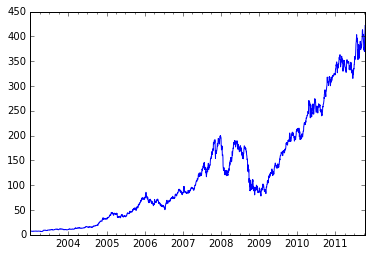

In [32]:
# 繪製 AAPL數據
close_px.AAPL.plot()

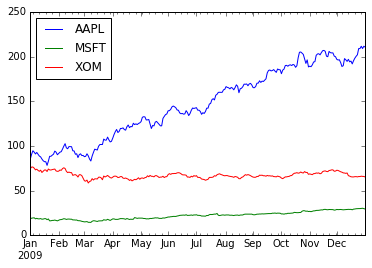

In [33]:
# 用字串指定 年度
close_px.ix['2009'].plot()

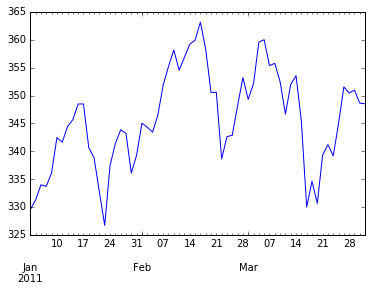

In [34]:
close_px.ix['2011/1' : '2011/3', 'AAPL'].plot()

## 移動窗口函數(moving window function)

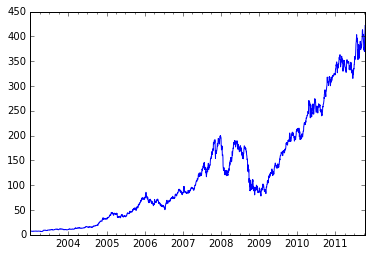

In [38]:
close_px.AAPL.plot()

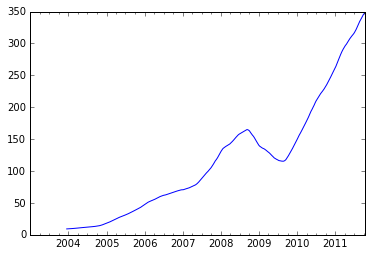

In [37]:
# rolling_mean()
# 移動平均， window = 250
pd.rolling_mean(close_px.AAPL, window = 250).plot()

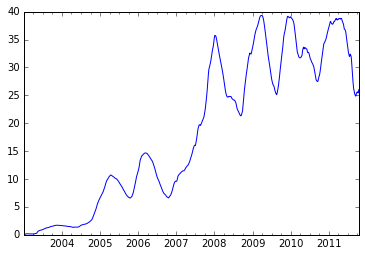

In [39]:
# rolling_std()
# 移動標準差， window = 250
pd.rolling_std(close_px.AAPL, window = 250, min_periods = 10).plot()

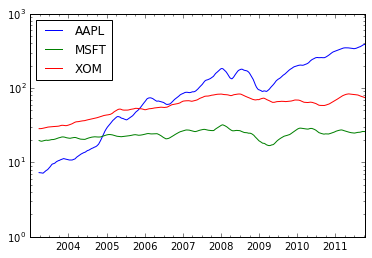

In [44]:
# rolling_mean()
# 移動標準差， window = 60
# 會對所有的列繪圖
pd.rolling_mean(close_px, window = 60).plot(logy = True)

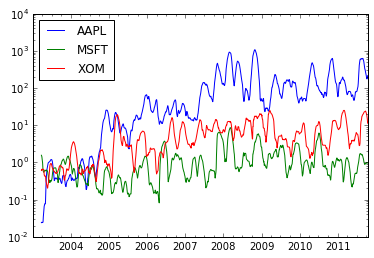

In [45]:
pd.rolling_var(close_px, window = 60).plot(logy = True)

### 指數加權函數

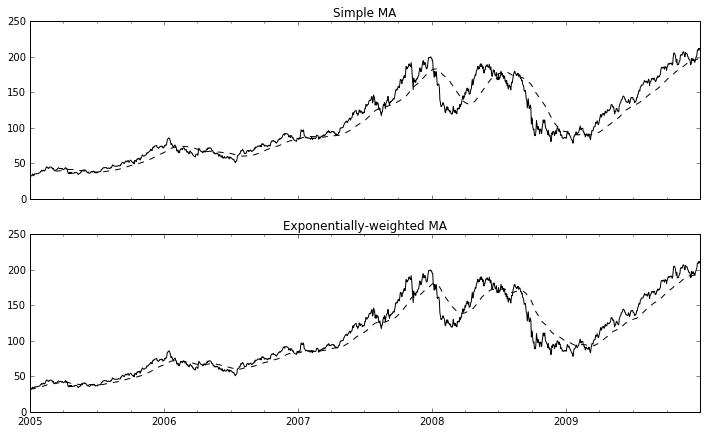

In [49]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = True, figsize = (12, 7))

aapl_px = close_px.AAPL['2005':'2009']
ma60 = pd.rolling_mean(aapl_px, 60, min_periods = 50)
ewma60 = pd.ewma(aapl_px, span = 60)

aapl_px.plot(style = 'k-', ax = axes[0])
ma60.plot(style = 'k--', ax = axes[0])

aapl_px.plot(style = 'k-', ax = axes[1])
ewma60.plot(style = 'k--', ax = axes[1])

axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### 二元移動窗口函數
需要對兩個時間序列來操作的函數，例如 rolling_corr()，計算兩個時間序列的 相關係數

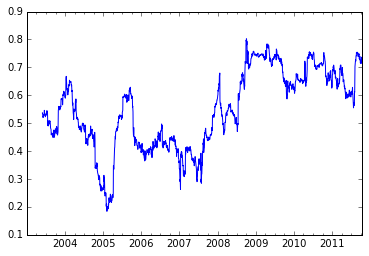

In [50]:
spx_px = data.SPX
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods = 100)
corr.plot()

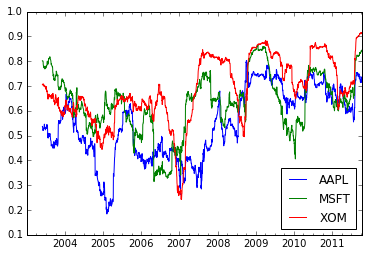

In [51]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods = 100)
corr.plot()

### 用戶定義的移動窗口函數
使用 rolling_apply()方法

In [52]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

ImportError: DLL load failed: 找不到指定的模組。

## 性能和內存使用方面的注意事項
頻率越高，聚合的時候就越費時間